In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.distributions.log_normal import LogNormal
from scipy.special import erfinv
from Helper.ImportDatasets import df_epsilon, df_epsilon_crit
from Method.calculate_distribution_a import distribution_a



# Check how mu and s relate

In [6]:
thetas = torch.tensor([[1, 1.1, 0.9], [0.1, 0.2, 0.3]])
D = torch.tensor([5, 6, 7, 8, 9])

distr = torch.distributions.log_normal.LogNormal(thetas[0], thetas[1])
vals = distr.cdf(D[:, None])

def calculate_s(a, sigma, mu):
    return (np.log(a)-mu)/(erfinv(2*sigma - 1)*np.sqrt(2))

Text(0, 0.5, 's')

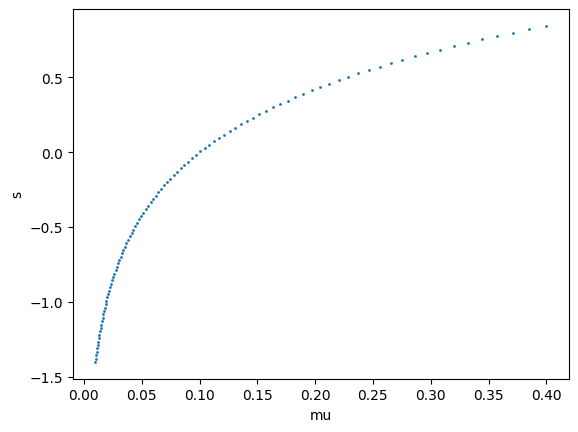

In [7]:
mu_upper = np.log(0.4)
mu_lower = np.log(0.01)

plt.scatter(np.exp(np.linspace(mu_lower, mu_upper, 100)), calculate_s(0.1, 0.05, np.linspace(mu_lower, mu_upper, 100)), s = 1)
plt.xlabel('mu')
plt.ylabel('s')

# Basically at np.log(a) = mu, s = 0, so we can sample uniformly from np.log(a) to mu_upper

# Calculate distributions of a

In [50]:

list = [1,2,3,4,5,6,7,8,9,10]
random.shuffle(list)
list

[8, 3, 7, 2, 9, 4, 1, 10, 5, 6]

In [51]:
import matplotlib.animation as animation
import random
"""
We pick sigma, delta, network and number of samples. Although delta doesn't matter much as the region of a we use is large enough to quickly find a solution where prob = 1
"""
def run(network, ani = False, shuffle = False):
    sigma = 0.05
    delta = 0.05
    n_samples = 10000
    
    # Get the network and test set, then split the images
    df_for_network = df_epsilon[df_epsilon['network'] == network]
    df_for_network = df_for_network[df_for_network['ds'] == 'test']
    df_per_image = [df_for_network[df_for_network['image'] == i] for i in df_for_network['image'].unique()]
    
    # We find the distribution of 'a' for the following values
    a = torch.linspace(0.001,0.399,200)
    
    # We keep track of the distributions of 'a' and its max probability
    distributions_of_a = []
    
    # Initialize D (dataset) and the default value to put in if we don't find elligible epsilons
    D = torch.tensor([[],[]],dtype=torch.float32)
    default = torch.tensor([[0.001],[0.4]],dtype=torch.float32)
    
    if shuffle:
        random.shuffle(df_per_image)
    
    for i,image in enumerate(df_per_image):
        # We put in the default value first and then change it to the lower and upper bound of the image
        D = torch.cat((D,default),dim=1)
        
        # unsat means epsilon >, thus lower bound
        lower_bound = np.max(image[image['result']=='unsat']['epsilon'].values)
        # sat means epsilon <, thus upper bound
        upper_bound = np.min(image[image['result']=='sat']['epsilon'].values)
        D[0,-1] = lower_bound
        D[1,-1] = upper_bound
        
        print(f"image {i+1}")
        
        # We calculate the distribution of 'a'
        distr = distribution_a(a,D,sigma,n_samples)
        max_distr = torch.max(distr)
        distributions_of_a.append(distr)
        
        # We check if we have attained a probability of at least 1-delta
        if max_distr > 1-delta:
            print('found')
            break
        
        # Most likely the above will not happen but the distribution of 'a' will become too peaked to fit in the range of a that has been given
        # In that case we are also satisfied as we know 'a' is in a small enough region
        if torch.isnan(max_distr):
           distributions_of_a.pop()
           print('found: region is too small')
           break
    
    if ani:
        fig, ax = plt.subplots()
    
        ax.set_ylim(0, 1)
        line, = ax.plot(a, np.tile(0,len(a)))
        
        
        def animate(i):
            line.set_ydata(distributions_of_a[i])  # update the data.
            return line,
        
        
        ani = animation.FuncAnimation(
            fig, animate, frames=len(distributions_of_a), interval=20, blit=True, save_count=50)
        
        # To save the animation, use e.g.
        #
        ani.save(network+".gif")
    
    return distributions_of_a

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

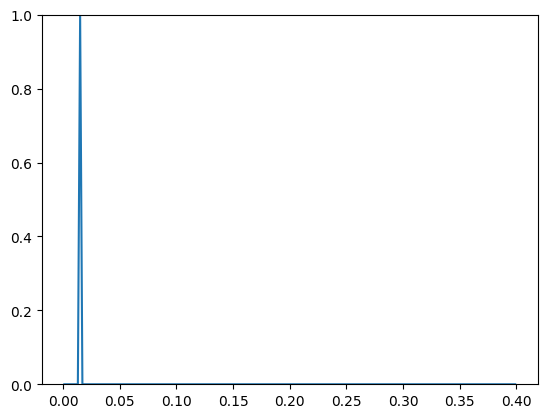

In [14]:
# Save as animation
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.set_ylim(0, 1)
line, = ax.plot(a, np.tile(0,len(a)))


def animate(i):
    line.set_ydata(distributions_of_a[i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, frames=len(distributions_of_a), interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
ani.save(network+".gif")

image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=27.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=29.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=24.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=25.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=29.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=25.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=26.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=24.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=26.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=25.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=27.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25


C:\Users\lkiel\AppData\Local\Temp\ipykernel_10120\1930368598.py:65: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=24.
  ani = animation.FuncAnimation(
MovieWriter ffmpeg unavailable; using Pillow instead.


found: region is too small


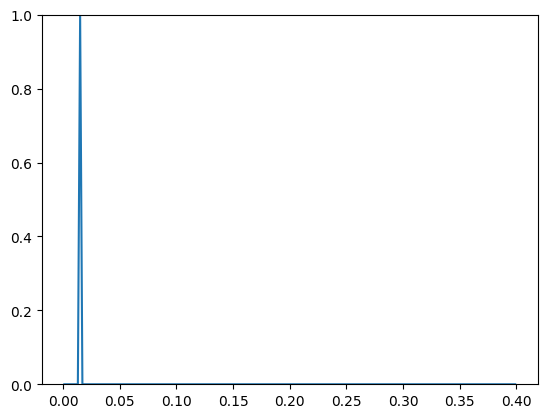

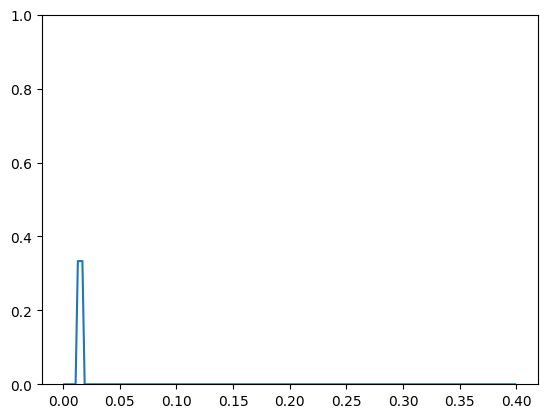

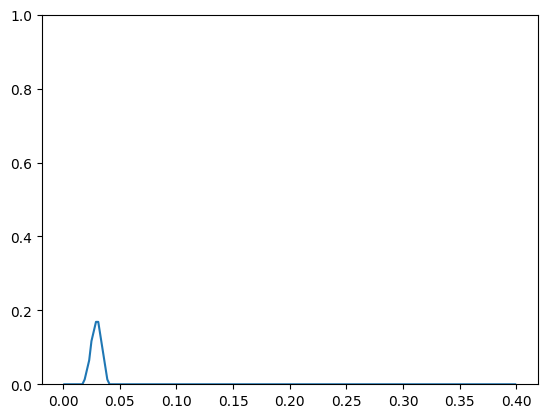

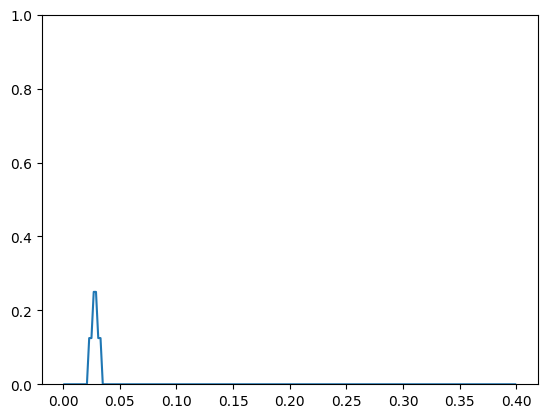

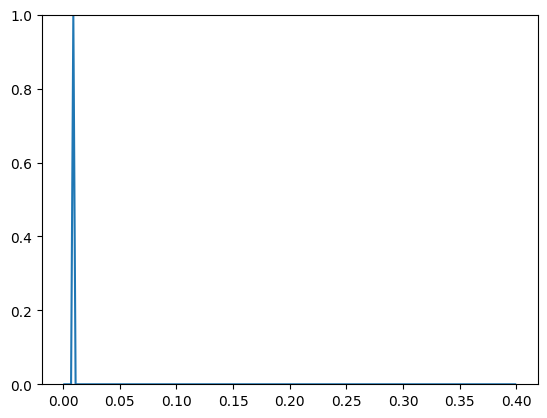

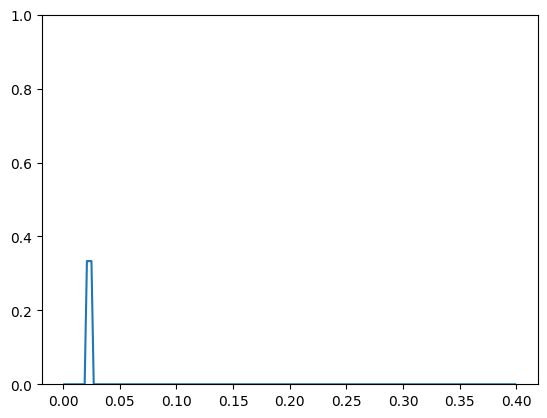

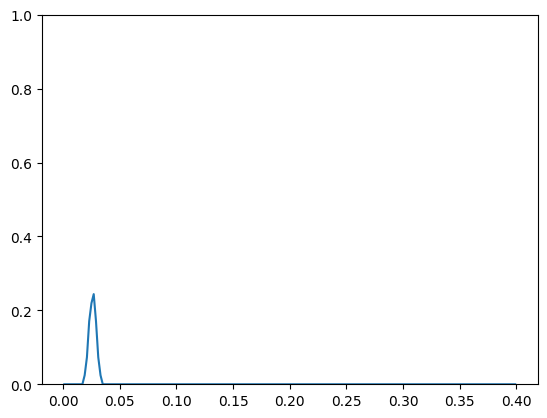

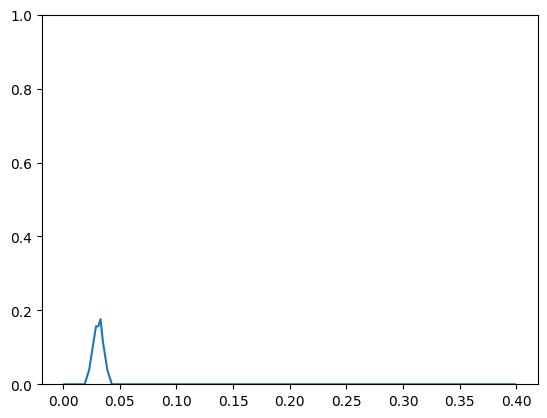

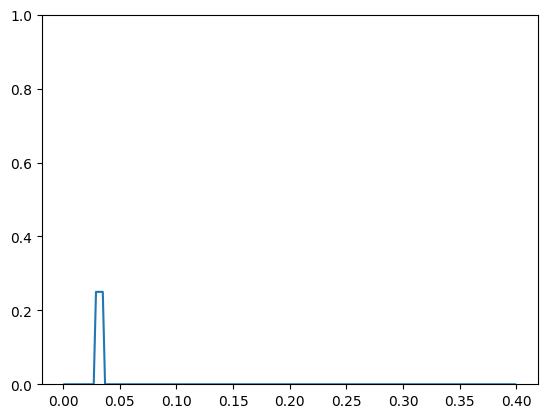

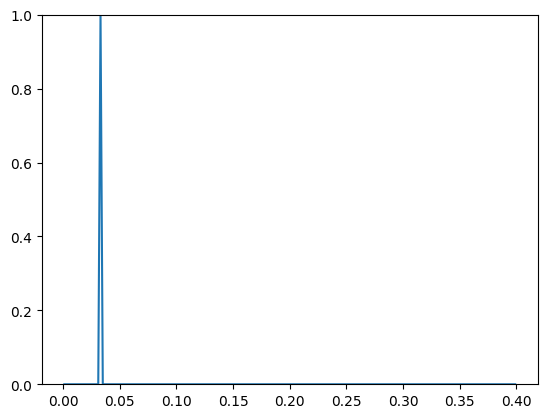

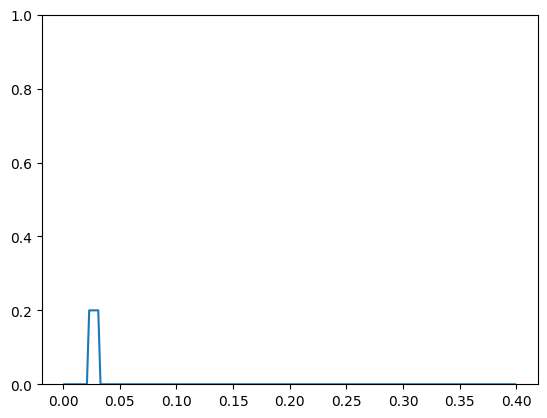

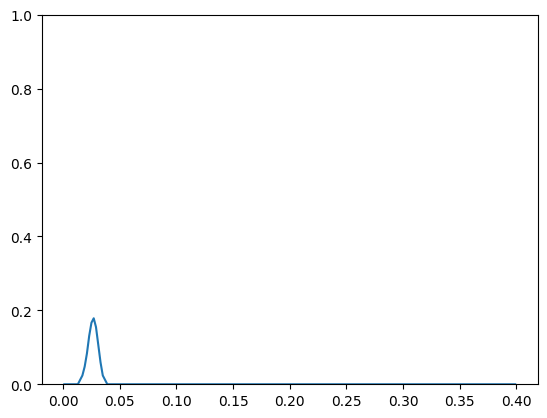

In [10]:
distrs = []
for network in df_epsilon['network'].unique():
    distrs.append(run(network))

In [38]:
import pandas as pd

a = torch.linspace(0.001,0.399,200)
df_distr_a = pd.DataFrame(columns=['a','network','image','probability'])
for i,net in enumerate(distrs):
    network = df_epsilon['network'].unique()[i]
    for j,distr in enumerate(net):
        temp_df = pd.DataFrame(columns=['a','network','image','probability'])
        temp_df['a'] = a
        temp_df['probability'] = distr
        temp_df['network'] = network
        temp_df['image'] = j
        df_distr_a = pd.concat([df_distr_a,temp_df])

In [42]:
# save as csv and as excel
df_distr_a.to_csv('distr_a.csv')
df_distr_a.to_excel('distr_a.xlsx')
df_distr_a

,a,network,image,probability
0,0.001,mnist-net,0,0.012807
1,0.003,mnist-net,0,0.016432
2,0.005,mnist-net,0,0.019386
3,0.007,mnist-net,0,0.021908
4,0.009,mnist-net,0,0.023915
...,...,...,...,...
195,0.391,mnist_relu_9_200,23,0.000000
196,0.393,mnist_relu_9_200,23,0.000000
197,0.395,mnist_relu_9_200,23,0.000000
198,0.397,mnist_relu_9_200,23,0.000000


In [53]:
# How much does the random sampling matter?
network = 'mnist-net'

a = np.linspace(0.001,0.399,200)
final_distr = []
values = np.tile(np.nan,(2,100)).astype(np.float32)
for i in range(100):
    temp_distr = run(network, ani=False, shuffle = True)[-1].numpy()
    final_distr.append(temp_distr)
    temp_as = a[temp_distr > 0]
    values[0,i] = np.min(temp_as)
    values[1,i] = np.max(temp_as)

# save the files
np.save('values.npy',values)
np.save('final_distr.npy',np.array(final_distr))
    

image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
found: region is too small
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
i

(array([ 5.,  0.,  0., 25.,  0.,  0., 24.,  0.,  0.,  0., 22.,  0.,  0.,
        16.,  0.,  0.,  6.,  0.,  0.,  2.]),
 array([0.007 , 0.0076, 0.0082, 0.0088, 0.0094, 0.01  , 0.0106, 0.0112,
        0.0118, 0.0124, 0.013 , 0.0136, 0.0142, 0.0148, 0.0154, 0.016 ,
        0.0166, 0.0172, 0.0178, 0.0184, 0.019 ]),
 <BarContainer object of 20 artists>)

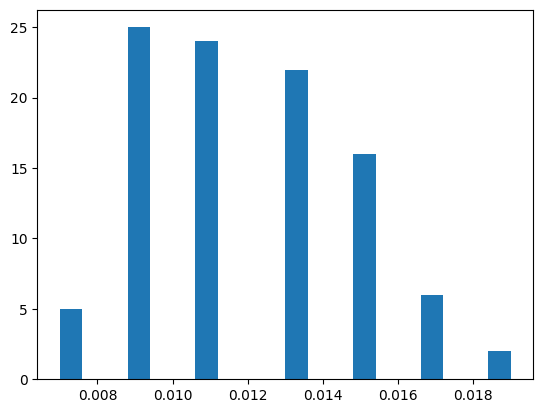

In [56]:
#make histogram
plt.hist(values[0,:],bins=[20])

In [57]:
values

array([[0.015, 0.011, 0.013, 0.011, 0.011, 0.009, 0.011, 0.013, 0.011,
        0.011, 0.011, 0.009, 0.007, 0.015, 0.007, 0.009, 0.009, 0.009,
        0.009, 0.017, 0.009, 0.015, 0.011, 0.007, 0.015, 0.013, 0.013,
        0.011, 0.009, 0.013, 0.013, 0.007, 0.009, 0.013, 0.013, 0.015,
        0.017, 0.017, 0.011, 0.013, 0.017, 0.013, 0.015, 0.013, 0.011,
        0.011, 0.015, 0.009, 0.009, 0.013, 0.009, 0.015, 0.011, 0.013,
        0.011, 0.013, 0.009, 0.015, 0.009, 0.009, 0.011, 0.015, 0.015,
        0.013, 0.015, 0.009, 0.013, 0.009, 0.015, 0.011, 0.011, 0.013,
        0.009, 0.011, 0.011, 0.015, 0.013, 0.017, 0.011, 0.011, 0.009,
        0.013, 0.009, 0.011, 0.013, 0.007, 0.013, 0.009, 0.009, 0.009,
        0.019, 0.009, 0.017, 0.015, 0.011, 0.009, 0.013, 0.015, 0.019,
        0.011],
       [0.021, 0.021, 0.021, 0.025, 0.015, 0.017, 0.019, 0.021, 0.017,
        0.017, 0.013, 0.015, 0.013, 0.015, 0.015, 0.021, 0.017, 0.017,
        0.021, 0.019, 0.017, 0.017, 0.017, 0.019, 0.021, 0.01

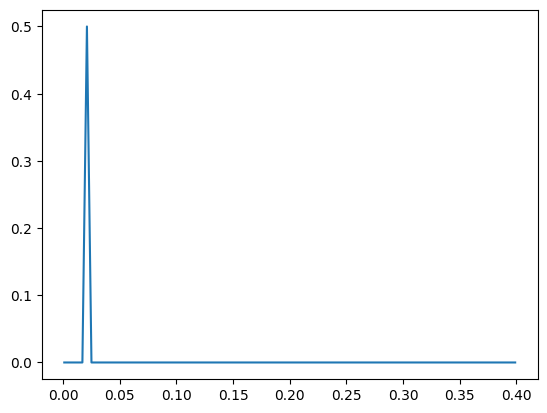

In [60]:
plt.plot(a,final_distr[98])

In [59]:
final_distr[12]

array([-0.        , -0.        ,  0.        ,  0.16666667,  0.33333334,
        0.33333334,  0.16666667,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

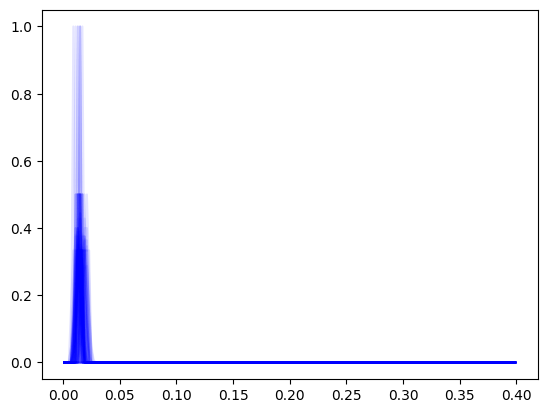

In [64]:
for distr in final_distr:
    plt.plot(a,distr, alpha = 0.1, c = 'b')

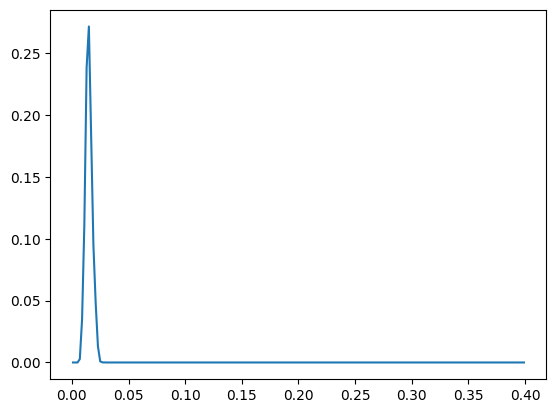

In [72]:
final_distr = np.array(final_distr)
means = np.mean(final_distr, axis = 0)
plt.plot(a,means)